## Tải thư viện cần thiết.

In [31]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


## Phân tích.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
raw_df = pd.read_csv('Data/hotwheels.csv')
len(raw_df)

100

In [34]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        100 non-null    int64  
 1   text                           100 non-null    object 
 2   post_text                      67 non-null     object 
 3   shared_text                    33 non-null     object 
 4   original_text                  0 non-null      float64
 5   time                           100 non-null    object 
 6   timestamp                      100 non-null    int64  
 7   image                          25 non-null     object 
 8   image_lowquality               100 non-null    object 
 9   images                         100 non-null    object 
 10  images_description             100 non-null    object 
 11  images_lowquality              100 non-null    object 
 12  images_lowquality_description  100 non-null    obje

In [55]:
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

In [36]:
reactions

{'like': 1367,
 'love': 661,
 'wow': 15,
 'care': 21,
 'angry': 1,
 'shares': 364,
 'comments': 210}

In [37]:
hehe = max(raw_df['reaction_count'])
x = raw_df[raw_df['reaction_count'] == hehe]
x

,post_id,text,post_text,shared_text,original_text,time,timestamp,image,image_lowquality,images,...,reaction_count,with,page_id,sharers,image_id,image_ids,video_ids,videos,was_live,fetched_time
45,636367022015466,Phoenix's creative garage spirit shines! 🏁🔥 Ch...,Phoenix's creative garage spirit shines! 🏁🔥 Ch...,NaN,NaN,2023-09-23 23:30:25,1695511825,NaN,https://scontent-xsp1-2.xx.fbcdn.net/v/t15.525...,[],...,9500,NaN,7645145806,NaN,NaN,[],NaN,NaN,False,NaN


In [38]:
y = raw_df[['post_id', 'text', 'reactions', 'reaction_count']]
y

,post_id,text,reactions,reaction_count
0,663497495969085,Only ten cars remain but only one car will tak...,"{'like': 1367, 'love': 661, 'wow': 15, 'care':...",2065
1,662533809398787,"Challengers, let’s race full speed ahead this ...",{'like': 9},9
2,662301126088722,Tune in this Saturday for the Hot Wheels Legen...,"{'like': 219, 'love': 58, 'wow': 1, 'care': 4}",282
3,661756316143203,This Saturday marks the sixth Hot Wheels Legen...,"{'like': 1133, 'love': 496, 'haha': 1, 'wow': ...",1670
4,1276112246404579,Join us for the Semi-Finals of the Hot Wheels ...,"{'like': 249, 'love': 81, 'haha': 1, 'wow': 2,...",335
...,...,...,...,...
95,130770646693712,"SUN, SEP 11\nHot Wheels Monster Trucks Live!",NaN,19
96,998235587977759,"SUN, SEP 4\nHot Wheels Monster Trucks Live!",NaN,20
97,300656448999300,"SUN, SEP 4\nHot Wheels Monster Trucks Live!",NaN,32
98,600244618961040,"Join Hot Wheels, NBC, Rutledge Wood and Dalal ...",NaN,1000


In [39]:
x = len(raw_df['reactions'])
for i in range(x):
    if pd.isna(raw_df['reactions'][i]):
        continue
    else:
        print(raw_df['reactions'][i])


{'like': 1367, 'love': 661, 'wow': 15, 'care': 21, 'angry': 1}
{'like': 9}
{'like': 219, 'love': 58, 'wow': 1, 'care': 4}
{'like': 1133, 'love': 496, 'haha': 1, 'wow': 14, 'care': 26}
{'like': 249, 'love': 81, 'haha': 1, 'wow': 2, 'care': 1, 'sad': 1}
{'like': 241, 'love': 146, 'haha': 22, 'wow': 5, 'care': 6, 'sad': 1, 'angry': 3}
{'like': 1021, 'love': 635, 'haha': 8, 'wow': 13, 'care': 19, 'sad': 1, 'angry': 1}
{'like': 717, 'love': 459, 'wow': 12, 'care': 17, 'sad': 1, 'angry': 1}
{'like': 187, 'love': 52, 'haha': 1, 'wow': 3, 'care': 1}
{'like': 329, 'love': 164, 'haha': 23, 'wow': 6, 'care': 7, 'sad': 1, 'angry': 1}
{'like': 173, 'love': 43, 'wow': 1, 'care': 2, 'angry': 1}


In [95]:
highest_reaction_count = max(raw_df['reaction_count'])
highest_reaction_count

9500

In [96]:
lowest_reaction_count = min(raw_df['reaction_count'])
lowest_reaction_count

9

In [97]:
average_reaction_count = raw_df['reaction_count'].mean()
average_reaction_count

707.65

In [101]:
# Lấy ra dataframe check gồm 3 cột time, timestamp và reaction_count để thống kê, và đảo lại dataframe do check được xếp từ thời điểm gần nhất tới xa nhất (để khi vẽ biểu đồ sẽ thuận nhìn và logic hơn).
check = raw_df[['time', 'timestamp', 'reaction_count']].iloc[::-1]

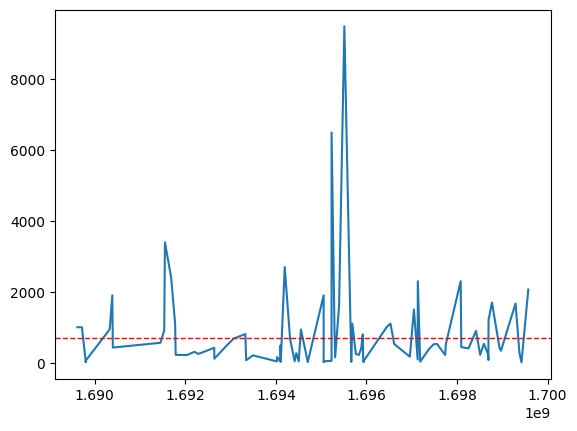

In [102]:
# biểu đồ thể hiện hiệu xuất react của các bài đăng theo thời gian từ qúa khứ đến hiện tại
dates = check['timestamp']
y = check['reaction_count']
plt.plot(dates,y)
plt.axhline(y=np.nanmean(y), color = 'red', linestyle = '--', linewidth = 1, label = 'avg')


Như ta có thể thấy trong biểu đồ đường ở trên, fanpage của "Hotwheels" có lượt số tương tác không ổn định theo thời gian, với nhiều những điểm nhọn (spikes) phân bố không đồng đều. Lượng reaction thấp nhất được ghi nhận là 9, và cao nhất là 9500, với điểm nhọn nổi bật nằm giữa timestamp 1.694 và 1.696. Lượng react trung bình trên trục thời gian giới hạn là ~ 707 reacts, được biểu diễn bằng đường màu đỏ.

In [49]:
ok = raw_df['likes']
ok

0     1367
1        9
2      219
3     1133
4      249
      ... 
95      19
96      20
97      32
98    1000
99    1000
Name: likes, Length: 100, dtype: int64